<h1><center> <b>LAB- 6</b></h1>


## Aim: Implementing gradient algorithm for finding the optimal set of weights and biases


## Theory:
Gradient descent is an optimization algorithm used to minimize the cost function by iteratively adjusting the weights and biases. In this experiment, we apply gradient descent to a linear regression model to find the optimal values of weights and biases, which minimize the error between the predicted and actual values.

For a dataset with inputs x and outputs y, the linear model is represented as:

    f(x) = w * x + b

where:
- w is the weight
- b is the bias
- f(x) is the predicted value

The cost function used in this experiment is the mean squared error (MSE), which is defined as:

    J(w, b) = (1 / 2m) * Σ [f(xᵢ) - yᵢ]²

where:
- m is the number of training examples
- f(xᵢ) is the prediction for input xᵢ
- yᵢ is the actual output for input xᵢ

The gradient descent algorithm works by updating the weights and biases in the direction that reduces the cost function. The gradients (partial derivatives of the cost function with respect to w and b) are computed as:

    ∂J/∂w = (1 / m) * Σ [(f(xᵢ) - yᵢ) * xᵢ]
    ∂J/∂b = (1 / m) * Σ (f(xᵢ) - yᵢ)

Using these gradients, the weights and biases are updated as:

    w = w - α * ∂J/∂w
    b = b - α * ∂J/∂b

where α is the learning rate, which controls the size of the update step.

This iterative process continues until the cost function converges, or a maximum number of iterations is reached.

In this experiment, we will:
1. Implement the cost function and gradient calculation.
2. Perform gradient descent to find the optimal weights and biases.
3. Visualize the convergence of the cost function over iterations.


In [ ]:
import math, copy
import numpy as np
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost

def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        J_history.append(cost_function(x, y, w, b))
        p_history.append([w, b])

        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters / 10) == 0:
            print(
                f"Iteration {i:4} : Cost {J_history[-1]:0.2e}  ",
                f"dj_dw: {dj_dw:0.3e}  , dj_db: {dj_db:0.5e}  "
            )

    return w, b, J_history, p_history  # return w and J,w history for graphing

w_init = 0
b_init = 0

# some gradient descent settings
iterations = 100000
tmp_alpha = 9.0e-2

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train,
    y_train,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
    compute_cost,
    compute_gradient,
)

print(f"(w,b) found by gradient descent: ({w_final:.4f}, {b_final:.4f})")

Iteration    0 : Cost 4.07e+04   dj_dw: -6.500e+02  , dj_db: -4.00000e+02  
Iteration 10000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
Iteration 20000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
Iteration 30000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
Iteration 40000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
Iteration 50000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
Iteration 60000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
Iteration 70000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
Iteration 80000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
Iteration 90000 : Cost 1.05e-25   dj_dw: -1.421e-13  , dj_db: 5.68434e-14  
(w,b) found by gradient descent: (200.0000, 100.0000)


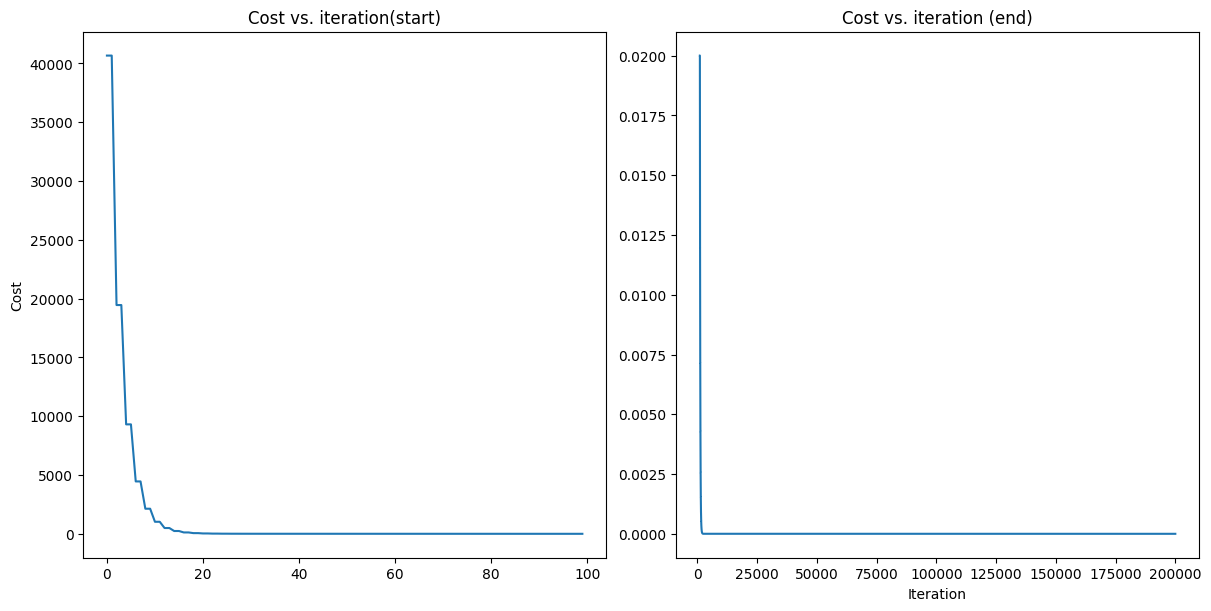

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_xlabel("Iteration")
plt.show()